In [3]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
titanic_train = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")

titanic = pd.concat([titanic_train,titanic_test])

In [4]:
titanic.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanic_filtrado = titanic.drop(columns=['Name','PassengerId','Cabin','Ticket'])

In [6]:
titanic_filtrado = titanic_filtrado.dropna()
titanic_filtrado.shape
titanic_filtrado.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [7]:
titanic_filtrado = pd.get_dummies(titanic_filtrado, columns=['Embarked','Sex'], drop_first=True)

titanic_filtrado = pd.get_dummies(titanic_filtrado, dtype=int)


In [8]:
titanic_filtrado.head()
titanic_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    float64
 1   Pclass      712 non-null    int64  
 2   Age         712 non-null    float64
 3   SibSp       712 non-null    int64  
 4   Parch       712 non-null    int64  
 5   Fare        712 non-null    float64
 6   Embarked_Q  712 non-null    bool   
 7   Embarked_S  712 non-null    bool   
 8   Sex_male    712 non-null    bool   
dtypes: bool(3), float64(3), int64(3)
memory usage: 41.0 KB


In [9]:

correlaciones = titanic_filtrado.corr(numeric_only=True)["Survived"].abs().sort_values(ascending=False)

print("Influencia de cada variable en la supervivencia:")
print(correlaciones[1:])

Influencia de cada variable en la supervivencia:
Sex_male      0.536762
Pclass        0.356462
Fare          0.266100
Embarked_S    0.159015
Parch         0.095265
Age           0.082446
Embarked_Q    0.048966
SibSp         0.015523
Name: Survived, dtype: float64


In [10]:
import pandas as pd
titanic_train = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")

titanic = pd.concat([titanic_train,titanic_test])
titanic_filtrado = titanic.drop(columns=['Name','PassengerId','Cabin','Ticket'])
titanic_filtrado = titanic_filtrado.dropna()
titanic_filtrado.shape
titanic_filtrado.head()
titanic_filtrado = pd.get_dummies(titanic_filtrado, columns=['Embarked','Sex'], drop_first=True)

titanic_filtrado = pd.get_dummies(titanic_filtrado, dtype=int)
correlaciones = titanic_filtrado.corr(numeric_only=True)["Survived"].abs().sort_values(ascending=False)

print("Influencia de cada variable en la supervivencia:")
print(correlaciones[1:])


Influencia de cada variable en la supervivencia:
Sex_male      0.536762
Pclass        0.356462
Fare          0.266100
Embarked_S    0.159015
Parch         0.095265
Age           0.082446
Embarked_Q    0.048966
SibSp         0.015523
Name: Survived, dtype: float64


In [ ]:
#Entrenamiento con SVM , RBF

X = titanic_filtrado.drop(columns=['Survived'])

y = titanic_filtrado['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=10.0, gamma=0.1, random_state=42))

modelo_svm.fit(X_train, y_train)

y_pred = modelo_svm.predict(X_test)

print(f"{accuracy_score(y_test, y_pred) * 100:.2f}%")

76.92%


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# X: Todas las columnas excepto 'Survived'
X = titanic_filtrado.drop(columns=['Survived'])

# y: Solo la columna 'Survived'
y = titanic_filtrado['Survived']

# Dividimos en 80% para entrenar y 20% para evaluar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
# Creamos el modelo
arbol = DecisionTreeClassifier(max_depth=3, random_state=42)

# Entrenamos con los datos de entrenamiento
arbol.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [115]:
# Predecimos sobre el grupo de prueba que separamos antes
predicciones = arbol.predict(X_test)

# Calculamos la precisión (accuracy)
precision = accuracy_score(y_test, predicciones)

print(f"Precisión del Árbol de Decisión: {precision * 100:.2f}%")

Precisión del Árbol de Decisión: 74.83%


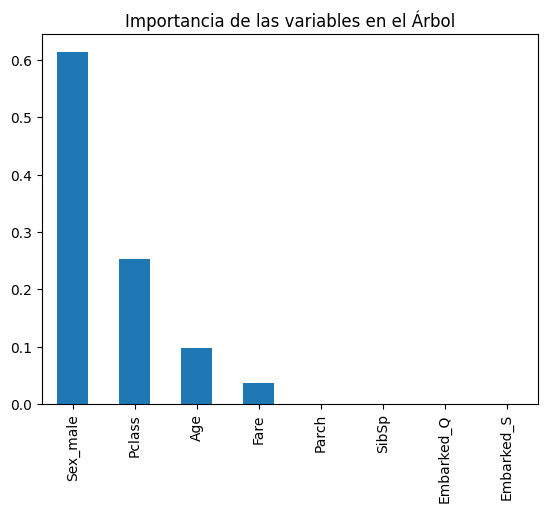

In [116]:
import matplotlib.pyplot as plt

# Ver importancia de las variables
importancias = pd.Series(arbol.feature_importances_, index=X.columns).sort_values(ascending=False)

importancias.plot(kind='bar', title='Importancia de las variables en el Árbol')
plt.show()

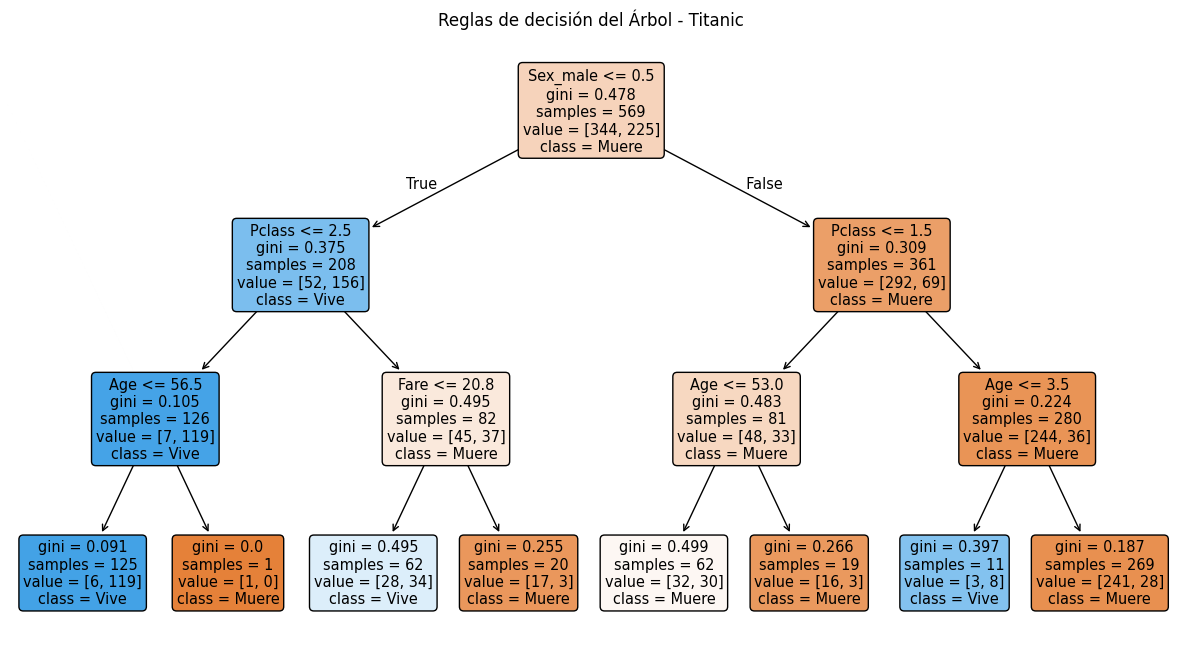

In [117]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
# 7. VISUALIZACIÓN DEL ÁRBOL
plt.figure(figsize=(15, 8))
plot_tree(arbol, 
          feature_names=X.columns, 
          class_names=['Muere', 'Vive'], 
          filled=True, 
          rounded=True)
plt.title("Reglas de decisión del Árbol - Titanic")
plt.show()